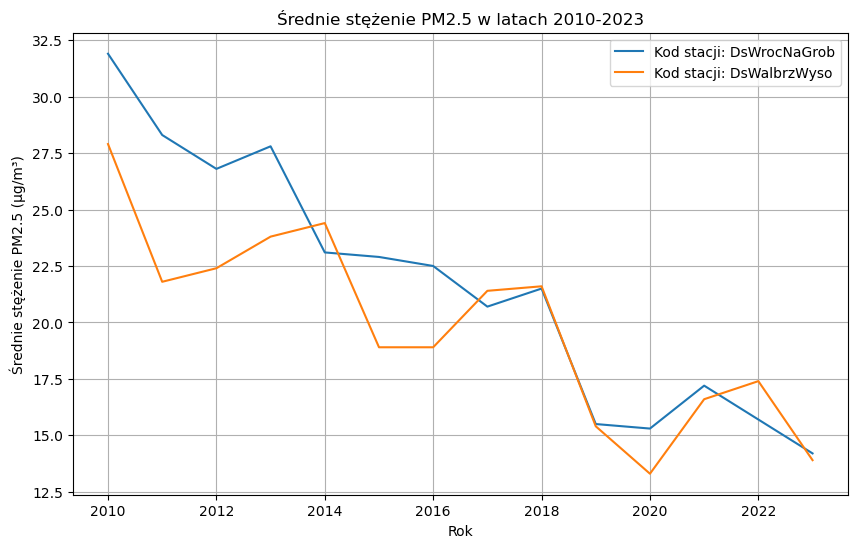

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data9.csv", skiprows=[1])
data_pm25 = data[(data['Rok'] >= 2010) & (data['Rok'] <= 2023) & (data['Czas uśredniania'] == '24g')]

# Wybór dwóch stacji pomiarowych z pełnymi danymi dla lat 2010-2023
stations = data_pm25.groupby('Kod stacji').filter(lambda x: len(x['Rok'].unique()) == 14)
station_1, station_2 = stations['Kod stacji'].unique()[:2]

data_station1 = data_pm25[data_pm25['Kod stacji'] == station_1][['Rok', 'Średnia']]
data_station2 = data_pm25[data_pm25['Kod stacji'] == station_2][['Rok', 'Średnia']]

plt.figure(figsize=(10, 6))
plt.plot(data_station1['Rok'], data_station1['Średnia'], label=f'Kod stacji: {station_1}')
plt.plot(data_station2['Rok'], data_station2['Średnia'], label=f'Kod stacji: {station_2}')
plt.title('Średnie stężenie PM2.5 w latach 2010-2023')
plt.xlabel('Rok')
plt.ylabel('Średnie stężenie PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

Podsumowanie: Porównanie dwóch stacji pokazuje trendy zmian w stężeniach PM2.5 na przestrzeni lat. Można zauważyć spadek stężenia PM2.5 wzrast z upływem czasu.

<Figure size 1200x600 with 0 Axes>

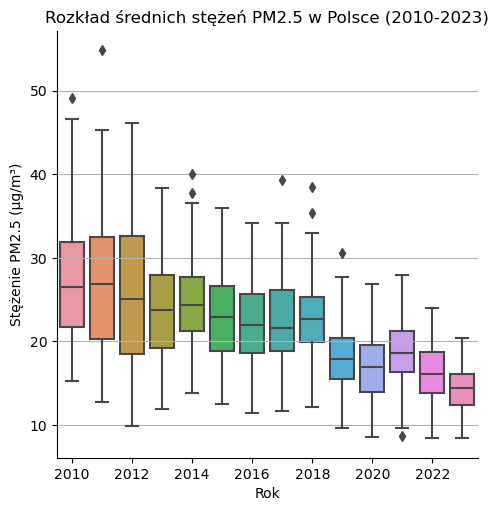

In [18]:
plt.figure(figsize=(12, 6))
sns.catplot(data=data_pm25, kind="box", x="Rok", y="Średnia")
plt.title('Rozkład średnich stężeń PM2.5 w Polsce (2010-2023)')
plt.xlabel('Rok')
plt.ylabel('Stężenie PM2.5 (µg/m³)')
plt.grid(axis='y')
plt.xticks(ticks=range(0, len(data_pm25['Rok'].unique()), 2))
plt.show()

Podsumowanie: Wykres pudełkowy pokazuje, jak zmieniała się wartość średnia oraz rozrzut danych PM2.5 w poszczególnych latach.
Można zauważyć stopniowe obniżanie się stężenia PM2.5.

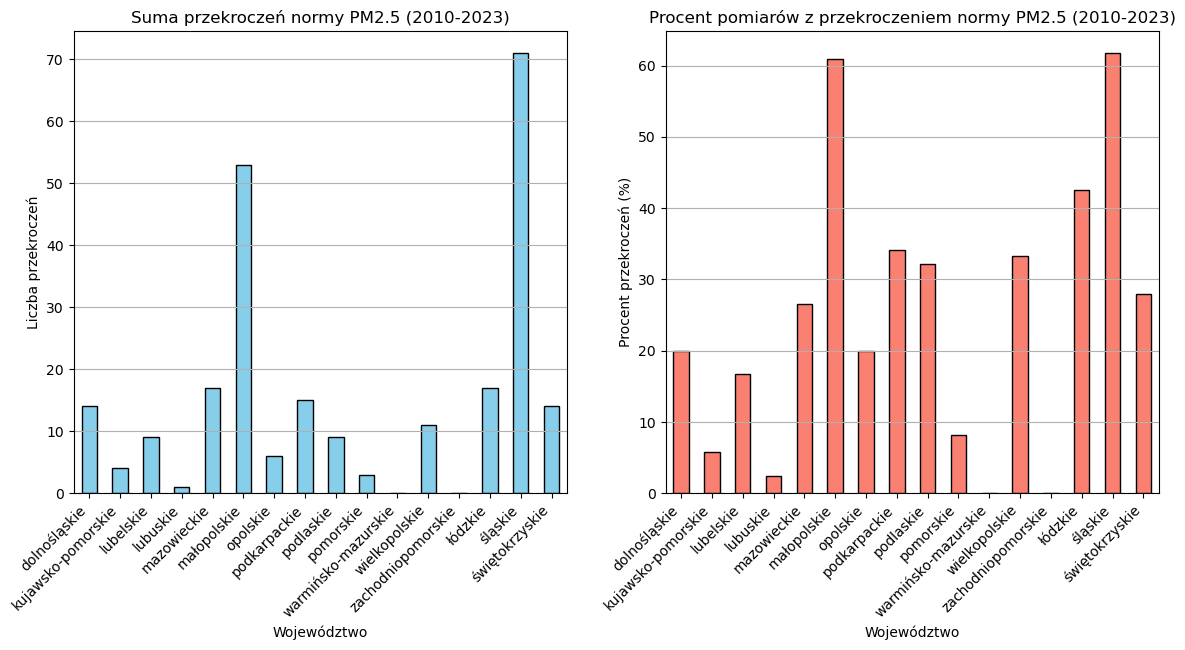

In [ ]:
data_pm25.loc['Przekroczenie_normy'] = (data_pm25['Średnia'] > 25).astype(int)

exceedances_total = data_pm25.groupby('Województwo')['Przekroczenie_normy'].sum()

exceedances_percent = data_pm25.groupby('Województwo').apply(lambda x: x['Przekroczenie_normy'].sum() / len(x) * 100)

# Wykres 1
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
exceedances_total.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Suma przekroczeń normy PM2.5 (2010-2023)')
plt.xlabel('Województwo')
plt.ylabel('Liczba przekroczeń')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y')

# Wykres 2
plt.subplot(1, 2, 2)
exceedances_percent.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Procent pomiarów z przekroczeniem normy PM2.5 (2010-2023)')
plt.xlabel('Województwo')
plt.ylabel('Procent przekroczeń (%)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y')
plt.show()


Podsumowanie:
Wykresy pokazują sume i procent przekroczeń normy PM2.5.